In [ ]:
!pip install tensorflow

In [ ]:
!pip install livelossplot

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from livelossplot import PlotLossesKerasTF

In [ ]:
df=pd.read_csv("/content/Airplane Accidents.csv")

In [ ]:
df.head()

,id,safety_score,days_since_inspection,complaints,control_metric,turbulence,cabin_temperature,accident_type,max_elevation,violations,weather_metric,severity
0,1,49.223743,14,22,71.285324,0.272118,78.04,2.0,31335.477,3,0.424352,minor_damage
1,2,62.465750,10,27,72.288055,0.423939,84.54,2.0,26024.710,2,0.352350,minor_damage
2,3,63.059360,13,16,66.362810,0.322604,78.86,7.0,39269.055,3,0.003364,significant_damage
3,4,48.082190,11,9,74.703735,0.337029,81.79,3.0,42771.500,1,0.211728,serious_damage
4,5,26.484018,13,25,47.948950,0.541140,77.16,3.0,35509.230,2,0.176883,significant_damage


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.severity.value_counts()

Fatal                 3049
serious_damage        2729
minor_damage          2527
significant_damage    1695
Name: severity, dtype: int64

In [ ]:
df.isnull().sum()

id                       0
safety_score             0
days_since_inspection    0
complaints               0
control_metric           8
turbulence               0
cabin_temperature        0
accident_type            3
max_elevation            0
violations               0
weather_metric           0
severity                 0
dtype: int64

In [ ]:
mean_control_metric = df['control_metric'].mean()
df['control_metric'].fillna(mean_control_metric, inplace=True)

mean_accident_type = df['accident_type'].mean()
df['accident_type'].fillna(mean_accident_type, inplace=True)



In [ ]:
df.isnull().sum()

id                       0
safety_score             0
days_since_inspection    0
complaints               0
control_metric           0
turbulence               0
cabin_temperature        0
accident_type            0
max_elevation            0
violations               0
weather_metric           0
severity                 0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['severity'] = le.fit_transform(df['severity'])

print(df.head())

   id  safety_score  days_since_inspection  ...  violations  weather_metric  severity
0   1     49.223743                     14  ...           3        0.424352         1
1   2     62.465750                     10  ...           2        0.352350         1
2   3     63.059360                     13  ...           3        0.003364         3
3   4     48.082190                     11  ...           1        0.211728         2
4   5     26.484018                     13  ...           2        0.176883         3

[5 rows x 12 columns]


In [ ]:
df.head()

,id,safety_score,days_since_inspection,complaints,control_metric,turbulence,cabin_temperature,accident_type,max_elevation,violations,weather_metric,severity
0,1,49.223743,14,22,71.285324,0.272118,78.04,2.0,31335.477,3,0.424352,1
1,2,62.465750,10,27,72.288055,0.423939,84.54,2.0,26024.710,2,0.352350,1
2,3,63.059360,13,16,66.362810,0.322604,78.86,7.0,39269.055,3,0.003364,3
3,4,48.082190,11,9,74.703735,0.337029,81.79,3.0,42771.500,1,0.211728,2
4,5,26.484018,13,25,47.948950,0.541140,77.16,3.0,35509.230,2,0.176883,3


<Axes: >

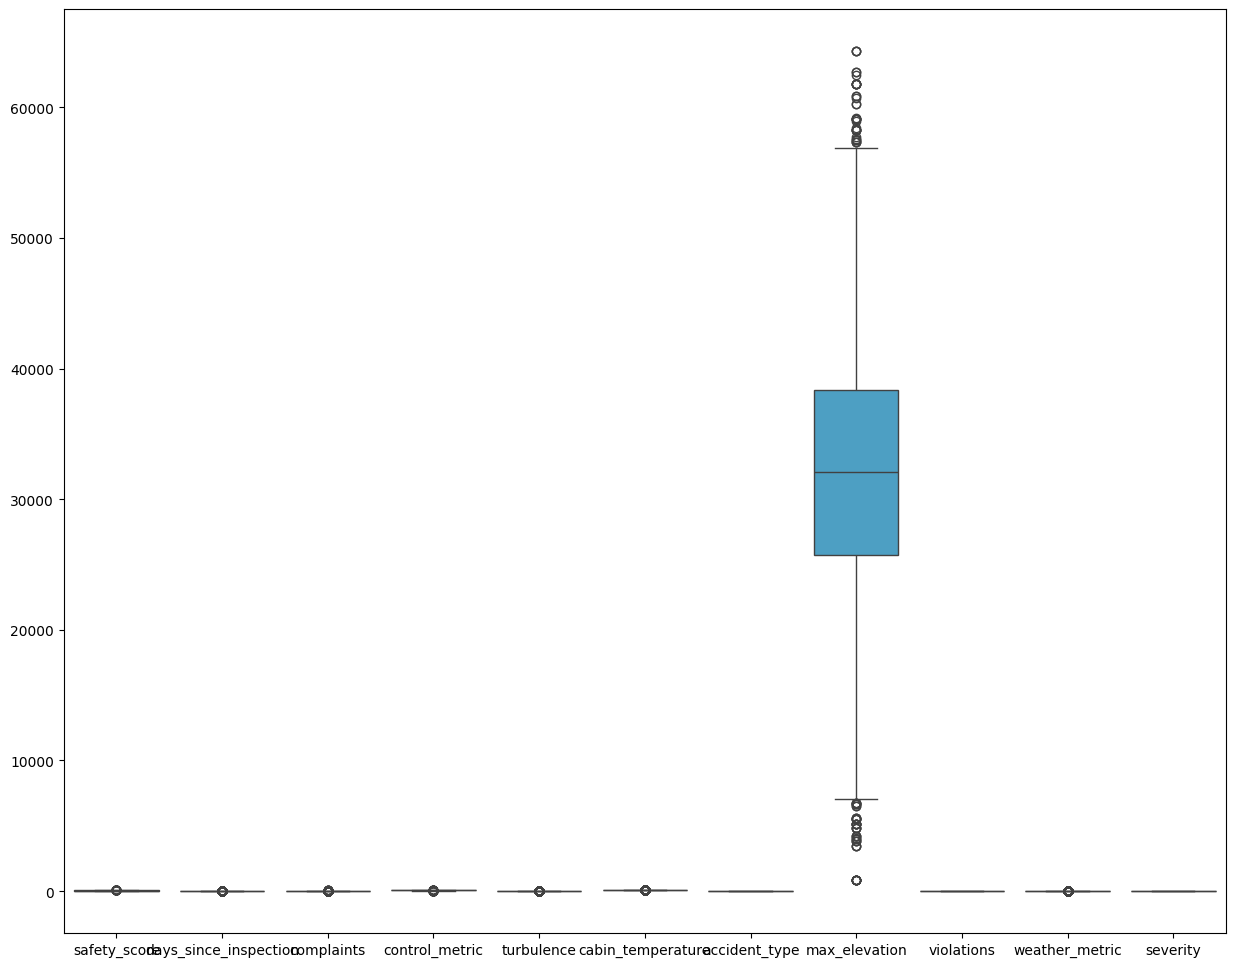

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))

sns.boxplot(data=df[['safety_score','days_since_inspection','complaints','control_metric','turbulence','cabin_temperature','accident_type','max_elevation','violations','weather_metric','severity']])

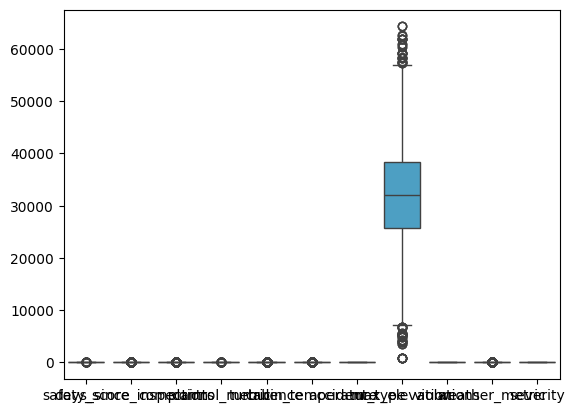

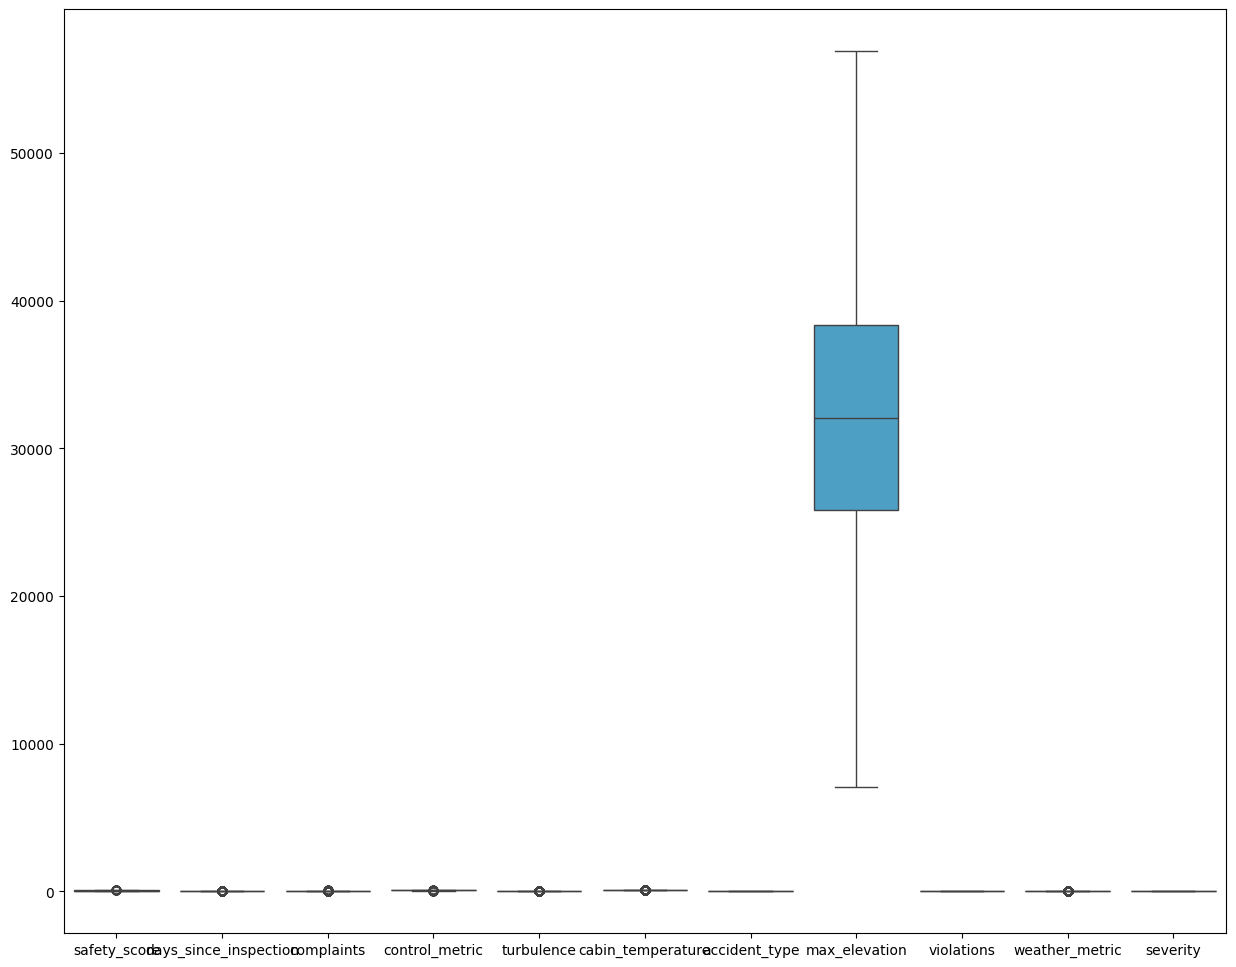

In [ ]:

sns.boxplot(data=df[['safety_score', 'days_since_inspection', 'complaints', 'control_metric', 'turbulence',
                     'cabin_temperature', 'accident_type', 'max_elevation', 'violations', 'weather_metric', 'severity']])


column_to_filter = 'max_elevation'

Q1 = df[column_to_filter].quantile(0.25)
Q3 = df[column_to_filter].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df[column_to_filter] >= lower_bound) & (df[column_to_filter] <= upper_bound)]

plt.figure(figsize=(15, 12))
sns.boxplot(data=df_filtered[['safety_score', 'days_since_inspection', 'complaints', 'control_metric', 'turbulence',
                              'cabin_temperature', 'accident_type', 'max_elevation', 'violations', 'weather_metric', 'severity']])

plt.show()


In [ ]:
x=df.drop(columns="severity")
y=df.severity

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(8000, 11)
(2000, 11)


In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train_std=st.fit_transform(x_train)
x_test_std=st.fit_transform(x_test)

In [ ]:
x_train_std

array([[ 0.83147035, -0.69710535,  1.72096061, ...,  0.26018907,
        -0.97269409, -0.60660101],
       [ 1.48342312,  0.37461963, -0.54122882, ...,  0.10806349,
        -0.01022622, -0.64680693],
       [-0.68744824, -0.65741174, -0.25845514, ..., -0.96622863,
        -0.97269409, -0.55714007],
       ...,
       [-0.59446028, -0.648906  ,  0.87263957, ...,  0.04533128,
        -0.97269409,  2.4480548 ],
       [ 1.6804608 , -1.41442386,  0.87263957, ..., -0.18147355,
         0.95224165,  2.24768944],
       [-0.77836212,  0.43699514,  0.30709222, ...,  0.68226739,
        -1.93516196, -0.59918233]])

In [ ]:
model=Sequential()

model.add(Input(shape=(11
                       ,),name="Input Layer"))

model.add(Dense(10,activation='relu',name="Hidden1"))

model.add(Dense(12,activation='relu',name="Hidden2"))

model.add(Dense(4,activation='softmax',name='OutputLayer'))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)   # momentum=0.0, nesterov=False,
tf.keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


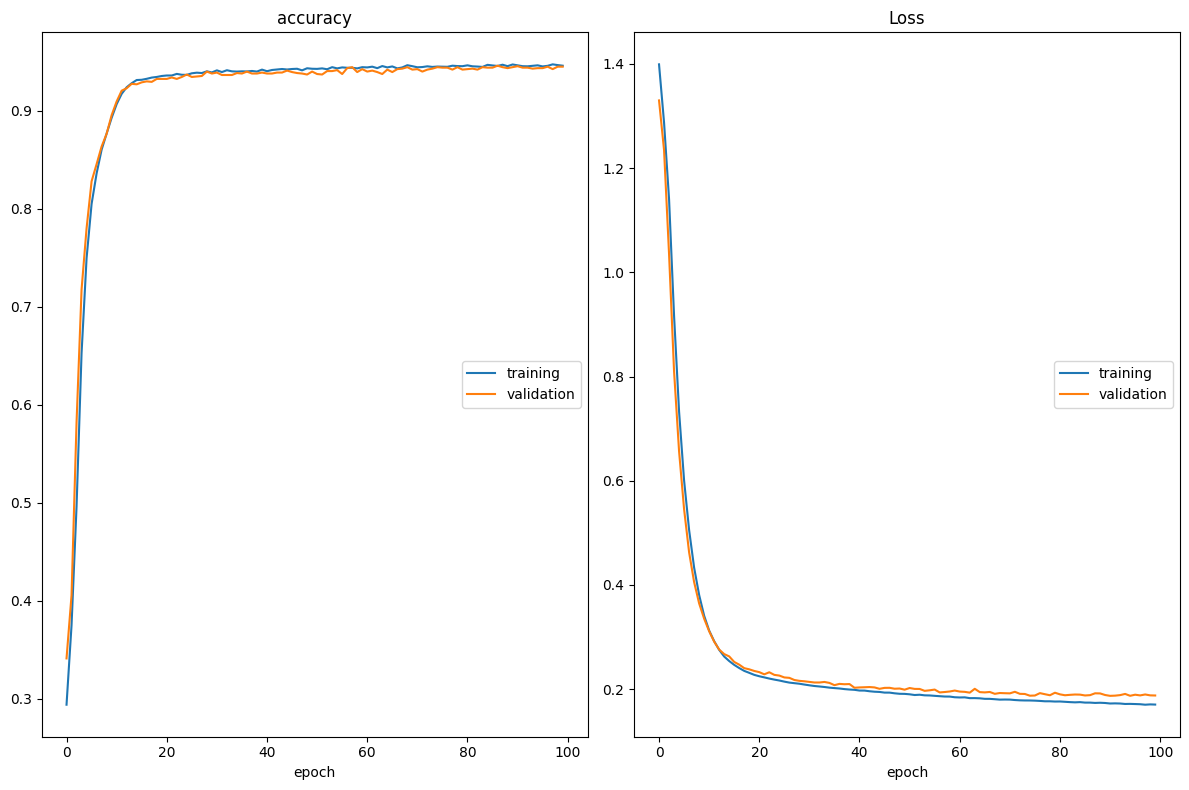

accuracy
	training         	 (min:    0.294, max:    0.947, cur:    0.946)
	validation       	 (min:    0.341, max:    0.946, cur:    0.945)
Loss
	training         	 (min:    0.170, max:    1.399, cur:    0.170)
	validation       	 (min:    0.187, max:    1.330, cur:    0.188)
250/250 [==============================] - 2s 7ms/step - loss: 0.1705 - accuracy: 0.9460 - val_loss: 0.1879 - val_accuracy: 0.9450


In [ ]:
model.fit(x_train_std,y_train,epochs=100,batch_size=32, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [ ]:
model=Sequential()

model.add(Input(shape=(11
                       ,),name="Input Layer"))

model.add(Dense(10,activation='relu',name="Hidden1"))

model.add(Dense(12,activation='relu',name="Hidden2"))

model.add(Dense(4,activation='softmax',name='OutputLayer'))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)   # momentum=0.0, nesterov=False,
tf.keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',optimizer='adagrad',metrics=['accuracy'])


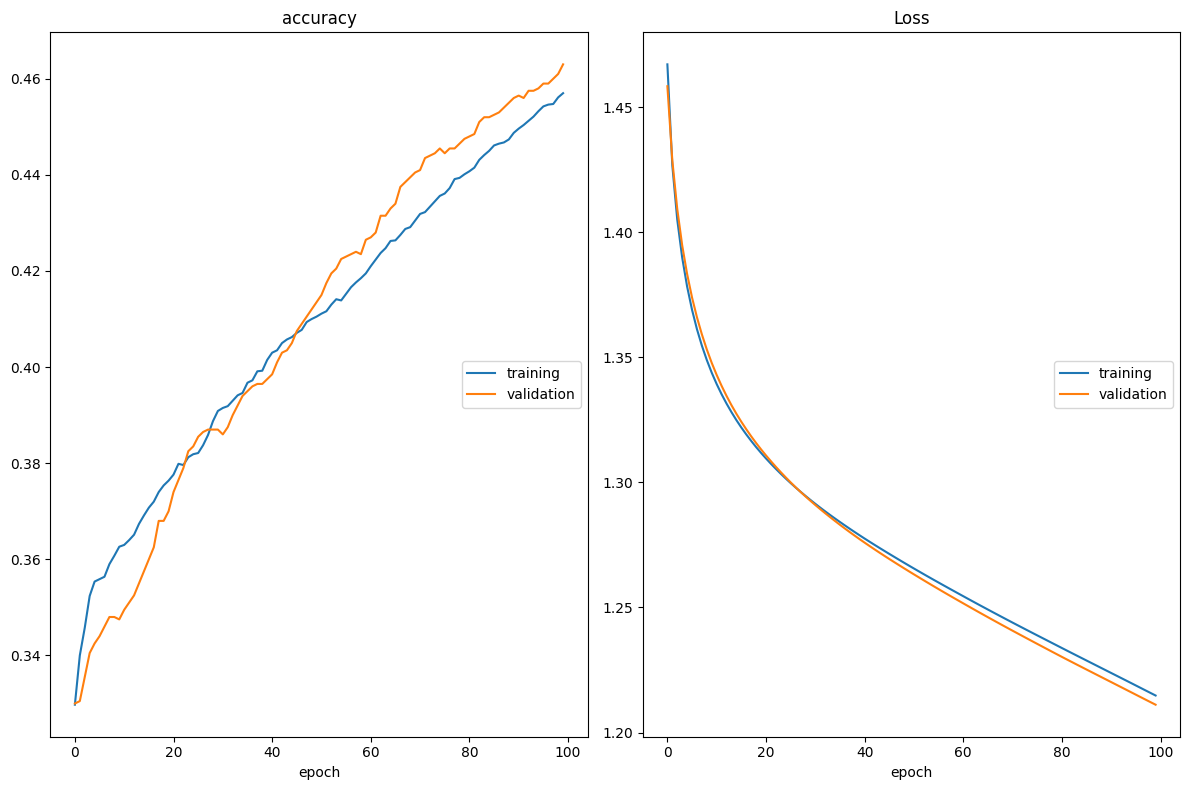

accuracy
	training         	 (min:    0.330, max:    0.457, cur:    0.457)
	validation       	 (min:    0.330, max:    0.463, cur:    0.463)
Loss
	training         	 (min:    1.215, max:    1.467, cur:    1.215)
	validation       	 (min:    1.211, max:    1.458, cur:    1.211)
250/250 [==============================] - 2s 8ms/step - loss: 1.2148 - accuracy: 0.4570 - val_loss: 1.2111 - val_accuracy: 0.4630


In [ ]:
model.fit(x_train_std,y_train,epochs=100,batch_size=32, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [ ]:
model=Sequential()

model.add(Input(shape=(11
                       ,),name="Input Layer"))

model.add(Dense(10,activation='relu',name="Hidden1"))

model.add(Dense(12,activation='relu',name="Hidden2"))

model.add(Dense(4,activation='softmax',name='OutputLayer'))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)   # momentum=0.0, nesterov=False,
tf.keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


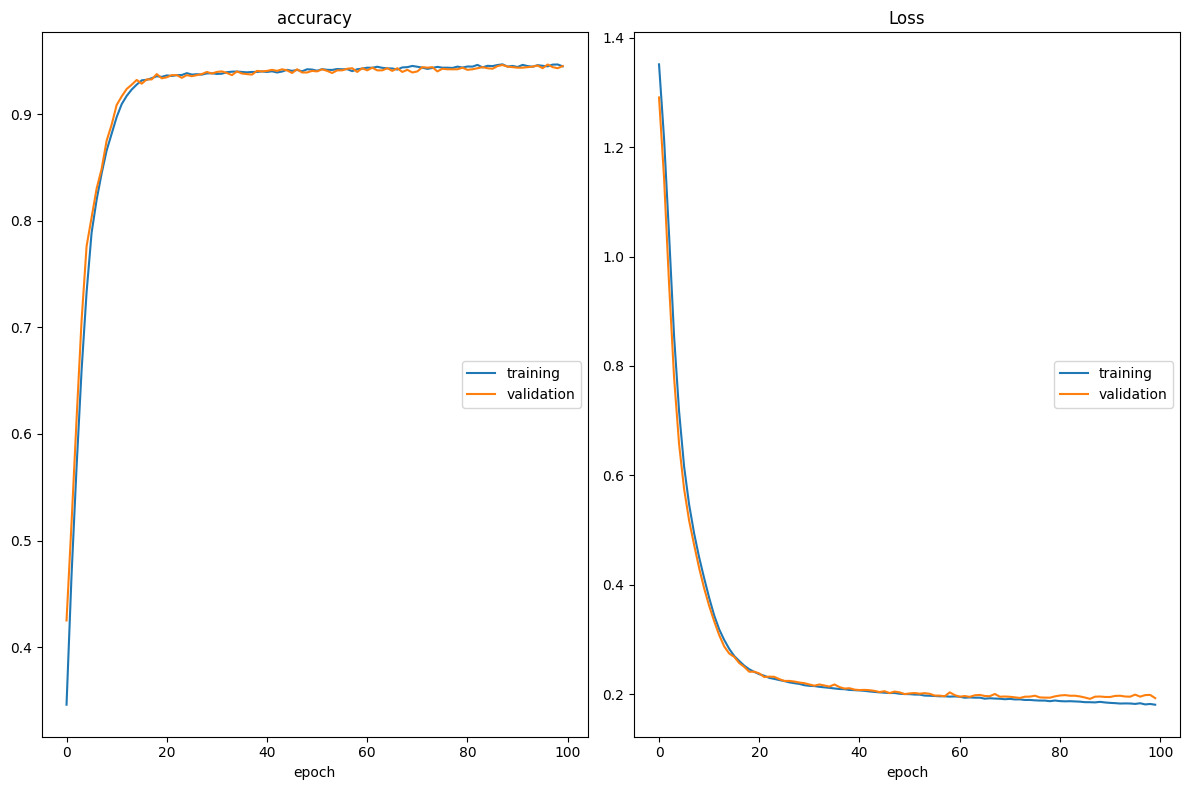

accuracy
	training         	 (min:    0.346, max:    0.947, cur:    0.945)
	validation       	 (min:    0.425, max:    0.947, cur:    0.945)
Loss
	training         	 (min:    0.181, max:    1.351, cur:    0.181)
	validation       	 (min:    0.192, max:    1.291, cur:    0.193)
250/250 [==============================] - 1s 5ms/step - loss: 0.1811 - accuracy: 0.9448 - val_loss: 0.1931 - val_accuracy: 0.9450


In [ ]:
model.fit(x_train_std,y_train,epochs=100,batch_size=32, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])